In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
sc.settings.n_jobs = 40
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [2]:
adata = sc.read_h5ad("Data/Output_231123_adata_scvi_random_sampleID_annot.h5ad") # 7 minutes.

In [3]:
adata # 393060 × 49133

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit', 'cluster_number', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

In [4]:
np.min(adata.X) # 0.0

0.0

In [6]:
adata.raw = adata

# Test for DorothEA

In [7]:
## conda env: pydeseq2
import decoupler as dc

In [8]:
## Retrieve CollecTRI TF collection from |omnipath
net = dc.get_collectri(organism='human', split_complexes=False) # 20s
net 

/home/ssun1116/anaconda3/envs/pydeseq2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [9]:
net.to_csv("CollecTRI_TF_collection.csv", index = False)

In [ ]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
) # 15m

In [ ]:
adata.obsm['ulm_estimate']

,ABL1,AEBP1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,...,ZNF384,ZNF395,ZNF410,ZNF423,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
10X119_2:TCGTACCCAGACAAAT,2.479003,-0.277196,2.433220,-0.168689,0.337387,-0.094417,4.222087,1.433708,6.806137,-0.506136,...,-0.843755,-0.506125,-0.168689,-0.462020,-0.506123,5.527341,3.197216,0.905382,0.692245,-0.506133
10X119_2:AGAGCGACACCGCTAG,2.602420,-0.278201,1.801574,-0.169301,0.338609,-0.169055,3.056325,2.823298,8.851110,1.537496,...,0.523117,-0.507958,1.200136,-0.463694,-0.507956,1.998802,-1.503025,0.798508,0.374797,-0.507967
10X119_2:AAGGAGCGTTGAGTTC,-0.393248,-0.278062,1.444730,-0.169216,0.338441,-0.884098,2.468821,2.139589,7.585584,-0.507716,...,-0.846389,-0.507705,-0.169216,2.778985,-0.507703,3.661989,-0.235002,0.876387,1.007483,-0.507713
10X119_2:ATAGACCAGGGTGTTG,1.977023,-0.348394,3.408592,-0.212017,-0.457844,-0.363512,4.762463,2.851517,9.880123,0.245825,...,0.093073,0.245819,-0.212017,0.385420,2.371891,3.457533,2.343241,1.318137,1.432809,-0.636137
10X119_2:TTAGGCATCCGAACGC,1.228105,-0.288841,2.468436,-0.175776,0.351560,-0.918371,5.209177,0.261083,8.796103,-0.527398,...,-0.879200,-0.527386,-0.175775,1.081255,0.899147,1.280286,1.711895,-0.272306,0.954225,-0.527395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsDG99HC_TTTGTTGGTTCATCTT-1,1.527367,-0.294975,3.886767,-0.179510,-1.619464,-0.247479,6.051013,0.246215,9.590897,0.783018,...,-0.897896,-0.538601,-0.179512,0.956066,1.440056,0.243025,-0.249295,0.829653,2.028738,-0.538610
hsDG99HC_TTTGTTGTCATCTATC-1,0.370489,-0.318937,3.005233,-1.254678,0.388204,0.648229,3.896001,1.605708,8.713428,-0.582365,...,-0.141746,-0.582354,-0.194094,1.741776,2.553821,4.009318,-0.269547,3.234047,1.424371,2.136251
hsDG99HC_TTTGTTGTCCTCGATC-1,1.031624,-0.210241,-0.649686,-1.843551,-1.459725,-0.668472,2.946640,2.480922,3.262628,-0.383891,...,-0.639964,-0.383883,-0.127946,-0.350437,3.047995,1.917155,1.410607,-0.198209,-0.388913,-0.383889
hsDG99HC_TTTGTTGTCGTTAGAC-1,-0.354783,1.671928,1.631865,-0.152662,0.305338,-0.797618,4.551394,0.934247,8.006782,-0.458055,...,0.114303,-0.458046,-0.152664,-0.418137,1.297366,2.464726,-1.837093,3.940813,1.103263,-0.458053


In [ ]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit', 'cluster_number', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'
    layers: 'counts', 'logcounts', 'scaled'

In [ ]:
# dc.get_acts returns a new AnnData object which holds the obtained activities in its .X attribute
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts 

AnnData object with n_obs × n_vars = 393060 × 757
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit', 'cluster_number', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'

In [ ]:
acts.write_h5ad("Data/Dorothea_acts.h5ad") # 30s

## Exploration

In [12]:
acts = sc.read_h5ad("Data/Dorothea_acts.h5ad")
acts

AnnData object with n_obs × n_vars = 393060 × 757
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit', 'cluster_number', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs', 'collectri_ulm_estimate', 'collectri_ulm_pvals', 'ulm_estimate', 'ulm_pvals'

In [17]:
pd.DataFrame(acts.obsm)

,0
0,X_scVI_sampleID
1,X_umap
2,_scvi_extra_categorical_covs
3,collectri_ulm_estimate
4,collectri_ulm_pvals
5,ulm_estimate
6,ulm_pvals


In [13]:
# identifies marker TFs using the same statistical tests available in scanpy’s scanpy.tl.rank_genes_groups.
df = dc.rank_sources_groups(acts, groupby='Leiden', reference='rest', method='t-test_overestim_var')
df # 5m

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,C0,rest,OLIG1,625.222091,5.050822,0.0,0.0
1,C0,rest,MYT1,527.496159,4.474898,0.0,0.0
2,C0,rest,NKX2-2,444.711124,2.589515,0.0,0.0
3,C0,rest,REST,394.554008,5.842865,0.0,0.0
4,C0,rest,NEUROG3,389.145728,2.339221,0.0,0.0
...,...,...,...,...,...,...,...
29518,C9,rest,MEF2C,-94.013838,-1.126953,0.0,0.0
29519,C9,rest,WWTR1,-101.015704,-2.164980,0.0,0.0
29520,C9,rest,MYOG,-101.671267,-1.404699,0.0,0.0
29521,C9,rest,NEUROD1,-113.502458,-1.483558,0.0,0.0


In [15]:
df.to_csv("Tables/Dorothea_TF_activity_by_Leiden.csv", index = True)

In [14]:
# # identifies marker TFs using the same statistical tests available in scanpy’s scanpy.tl.rank_genes_groups.
# df_celltype = dc.rank_sources_groups(acts, groupby='cluster_main', reference='rest', method='t-test_overestim_var')
# df_celltype # 1m

## Visualization

In [50]:
n_markers = 2
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'C0': ['OLIG1', 'MYT1'],
 'C1': ['KCNIP3', 'MEF2A'],
 'C10': ['SOX9', 'NFIA'],
 'C11': ['RORB', 'SATB2'],
 'C12': ['SPI1', 'IKZF1'],
 'C13': ['GFI1B', 'PITX3'],
 'C14': ['MYC', 'GLI1'],
 'C15': ['E2F7', 'GFI1B'],
 'C16': ['KLF15', 'IRF7'],
 'C17': ['BARX2', 'FEZF2'],
 'C18': ['ZFHX3', 'PHOX2A'],
 'C19': ['DLX1', 'SCX'],
 'C2': ['LRRFIP1', 'HOXA5'],
 'C20': ['RORB', 'MYRF'],
 'C21': ['FOXQ1', 'SHOX2'],
 'C22': ['PHOX2B', 'DLX1'],
 'C23': ['FOXQ1', 'SOX4'],
 'C24': ['LRRFIP1', 'RELA'],
 'C25': ['MYC', 'ZBTB4'],
 'C26': ['MYOCD', 'PRDM1'],
 'C27': ['HOXA9', 'MECP2'],
 'C28': ['PHOX2B', 'SP4'],
 'C29': ['ETS1', 'STAT1'],
 'C3': ['MYC', 'HOXA7'],
 'C30': ['PHOX2B', 'ZBTB18'],
 'C31': ['STAT1', 'EPAS1'],
 'C32': ['SKIL', 'ZBED1'],
 'C33': ['SIRT1', 'NR4A2'],
 'C34': ['POU2F2', 'TBXT'],
 'C35': ['NR4A2', 'PITX3'],
 'C36': ['FEZF2', 'NKX2-2'],
 'C37': ['TBR1', 'ZFPM2'],
 'C38': ['GATA2', 'KLF3'],
 'C4': ['SPDEF', 'SOX11'],
 'C5': ['RORB', 'MEF2A'],
 'C6': ['DLX1', 'FOXQ1'],
 'C7': ['DLX1', 'S

/home/ssun1116/anaconda3/envs/pydeseq2/lib/python3.11/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


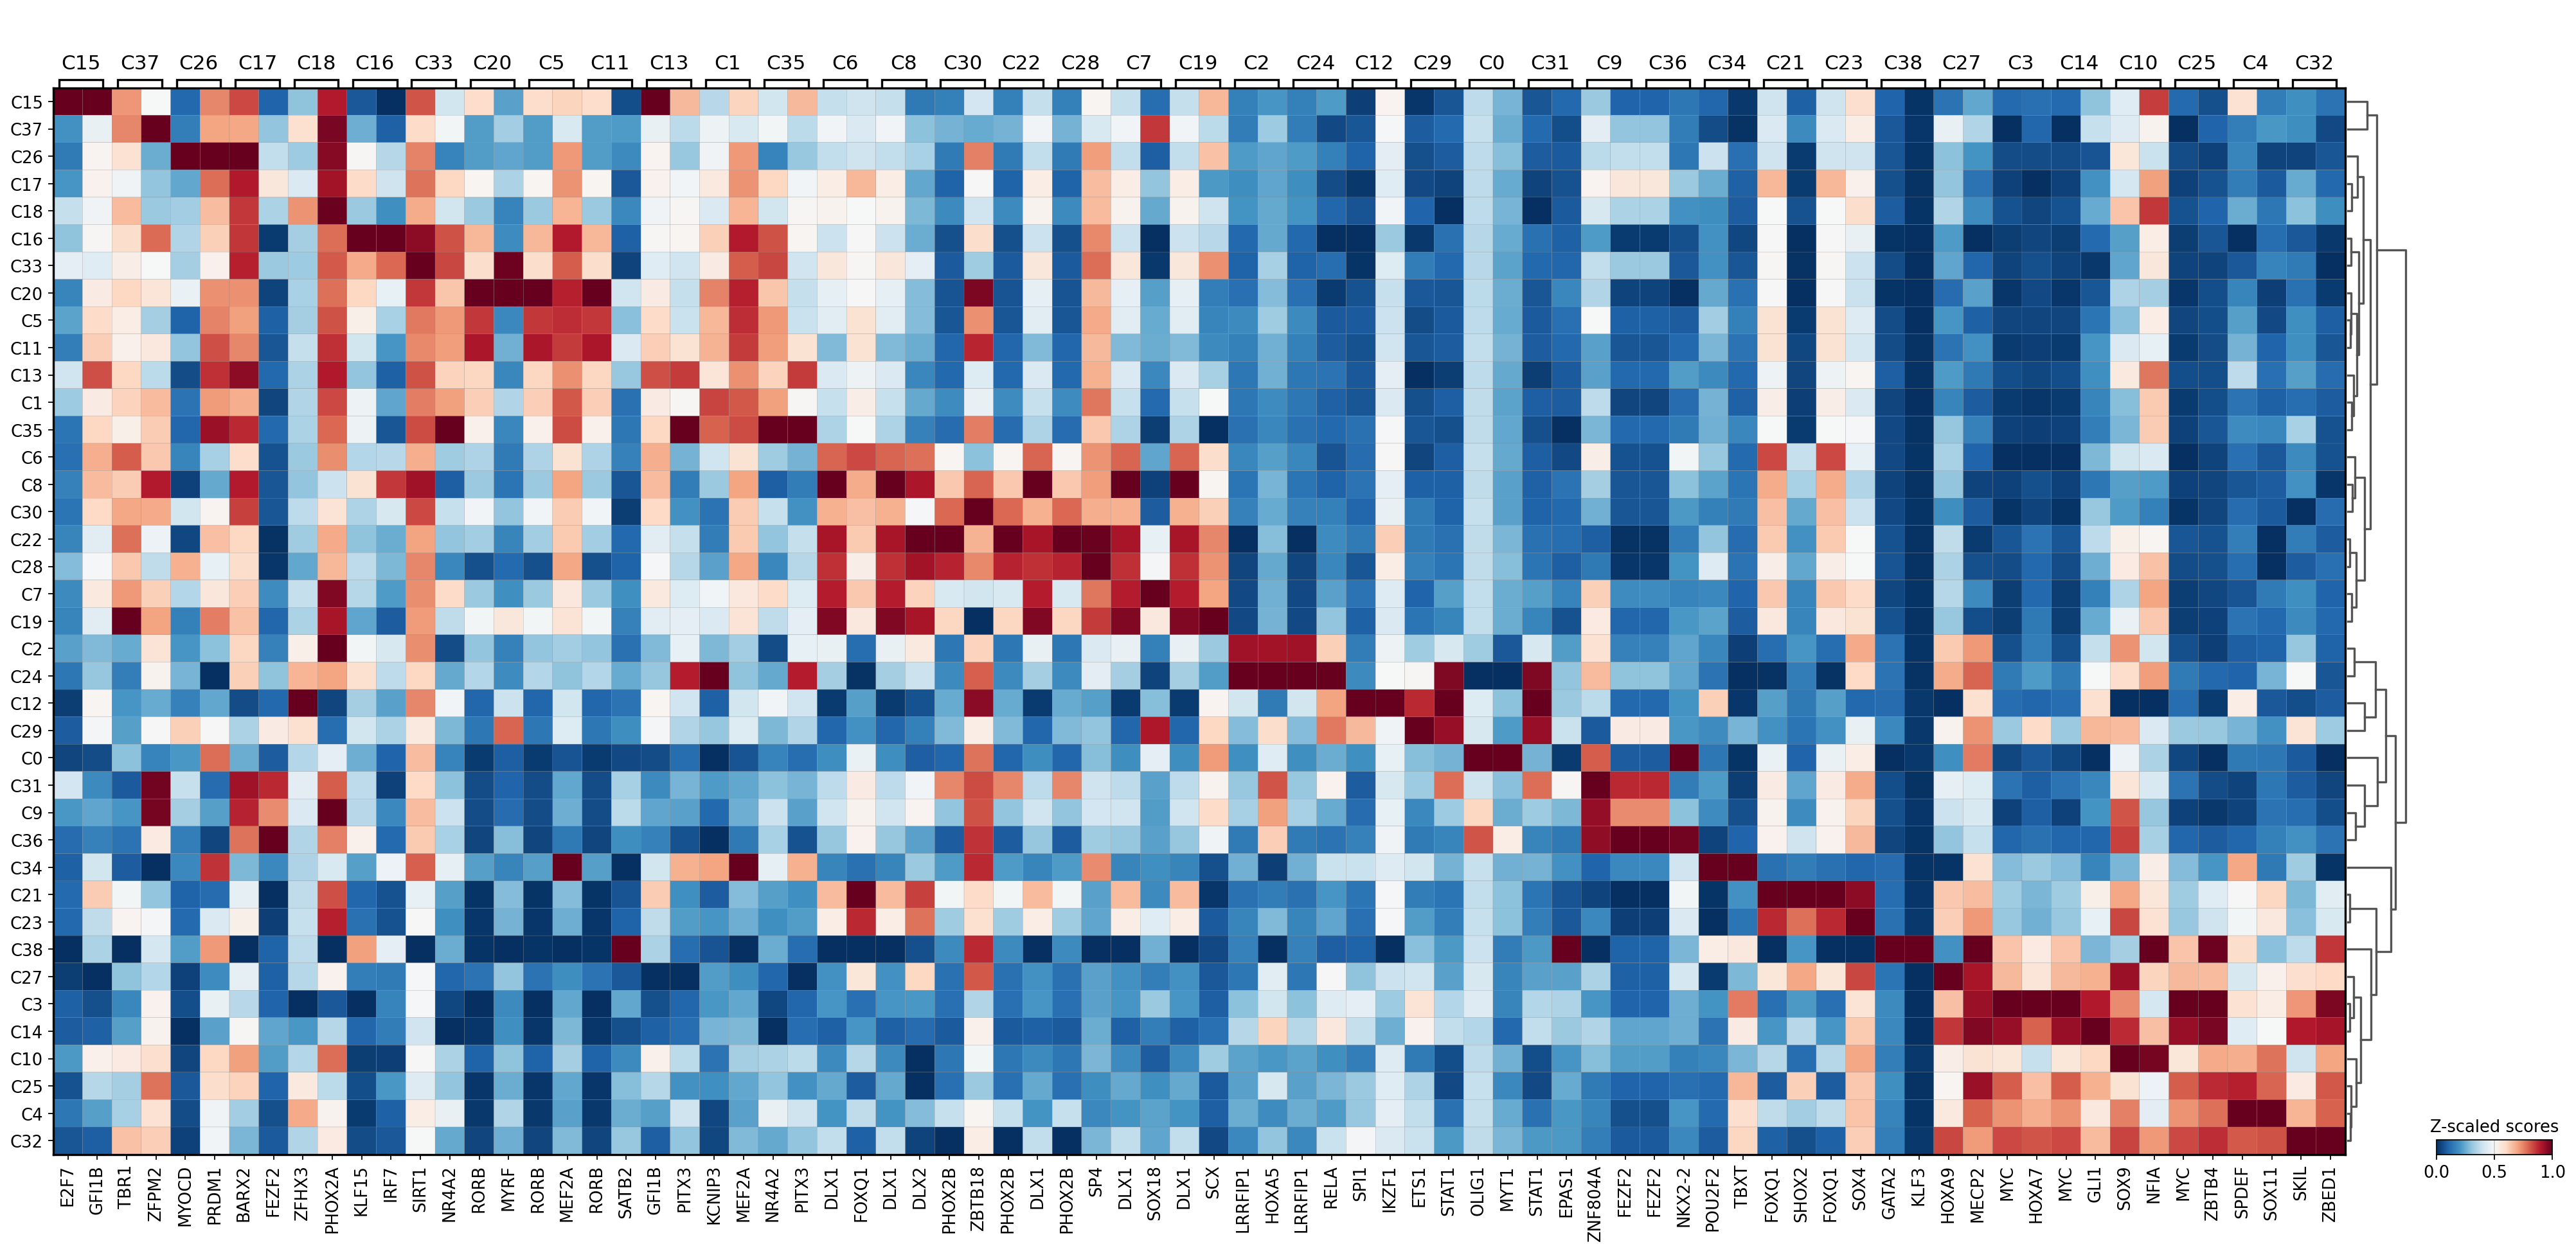

In [51]:
sc.pl.matrixplot(acts, source_markers, 'Leiden', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r') # 3s

In [52]:
n_markers = 5
source_markers = df_celltype.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'Astro': ['LRRFIP1', 'HOXA5', 'FOXA2', 'NFKB1', 'CEBPZ'],
 'Ext': ['MEF2A', 'RORB', 'NEUROD2', 'PLAGL2', 'NEUROD1'],
 'Inh': ['DLX1', 'DLX2', 'PHOX2B', 'FOXQ1', 'ZNF263'],
 'Micro': ['SPI1', 'IKZF1', 'NFE2L3', 'HNF1A', 'MYF5'],
 'Neuroblast': ['SOX11', 'MYC', 'ZBED1', 'ZBTB4', 'SPDEF'],
 'OPC': ['FEZF2', 'ZNF804A', 'TBX5', 'TADA2A', 'MKX'],
 'Oligo': ['OLIG1', 'MYT1', 'NKX2-2', 'REST', 'NEUROG3'],
 'Others': ['STAT1', 'ETS1', 'NFKB1', 'SMAD3', 'LMX1B'],
 'RG': ['MYC', 'ZBTB4', 'HOXA7', 'HDGF', 'HMGA2']}

/home/ssun1116/anaconda3/envs/pydeseq2/lib/python3.11/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


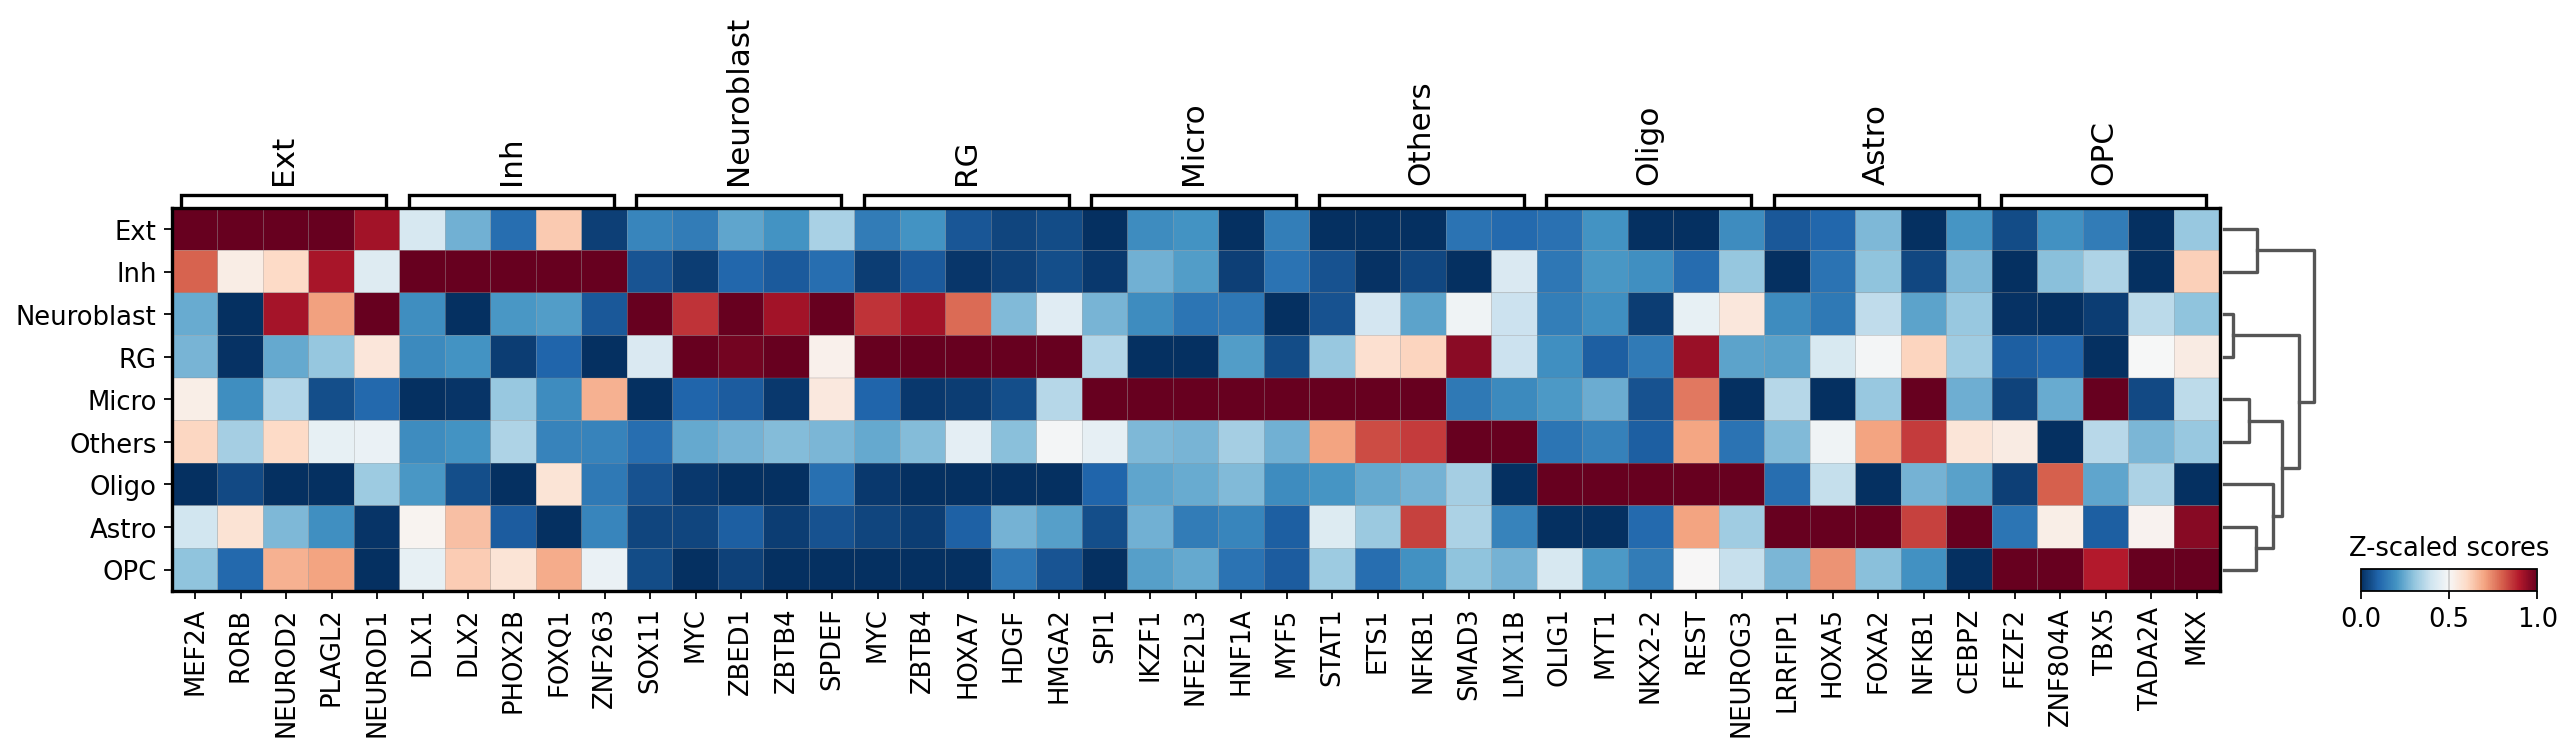

In [53]:
sc.pl.matrixplot(acts, source_markers, 'cluster_main', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r') # 40s